In [1]:
%config Completer.use_jedi = False

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date

In [3]:
df_diabetes = pd.read_csv("data/diabetes.csv")

In [5]:
df_diabetes.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome
0,101,58,17,265,24.2,0.614,1017,0
1,108,70,0,0,30.5,0.955,1031,1
2,148,60,27,318,30.9,0.150,1033,1
3,113,76,0,0,33.3,0.278,1035,1
4,83,86,19,0,29.3,0.317,1048,0


In [16]:
print(f"//----> shape: {df_diabetes.shape}")
df_diabetes.info()

//----> shape: (686, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   686 non-null    int64  
 1   BloodPressure             686 non-null    int64  
 2   SkinThickness             686 non-null    int64  
 3   Insulin                   686 non-null    int64  
 4   BMI                       686 non-null    float64
 5   DiabetesPedigreeFunction  686 non-null    float64
 6   PatientID                 686 non-null    int64  
 7   Outcome                   686 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.0 KB


In [13]:
### 
# Profile data
###
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,686.0,120.651603,31.857707,0.000,99.00000,117.0000,140.000,199.00
BloodPressure,686.0,69.448980,19.040706,0.000,64.00000,72.0000,80.000,122.00
SkinThickness,686.0,20.634111,15.944848,0.000,0.00000,23.0000,32.000,99.00
Insulin,686.0,80.583090,117.712149,0.000,0.00000,26.0000,127.750,846.00
BMI,686.0,31.974781,7.946174,0.000,27.30000,32.0000,36.600,67.10
DiabetesPedigreeFunction,686.0,0.469886,0.328851,0.078,0.24525,0.3705,0.618,2.42
PatientID,686.0,9529.288630,4890.669582,1017.000,5189.75000,9446.0000,13685.750,17995.00
Outcome,686.0,0.348397,0.476810,0.000,0.00000,0.0000,1.000,1.00


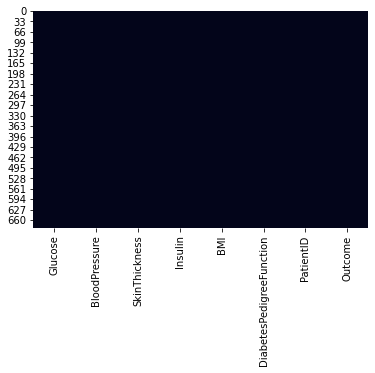

In [11]:
###
# Check for null values
###
sns.heatmap(df_diabetes.isnull(), cbar=False)

raw counts:
0    447
1    239
Name: Outcome, dtype: int64
% of:
0    65.16035
1    34.83965
Name: Outcome, dtype: float64


/Users/z001hqv/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


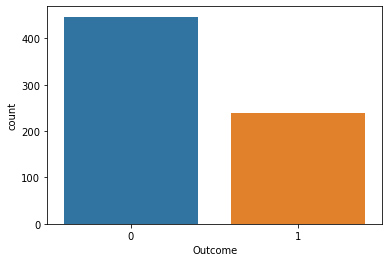

In [21]:
print(f"raw counts:\n{df_diabetes.Outcome.value_counts()}")
print(f"% of:\n{df_diabetes.Outcome.value_counts()*100/len(df_diabetes)}")
sns.countplot(df_diabetes.Outcome, label="Count")

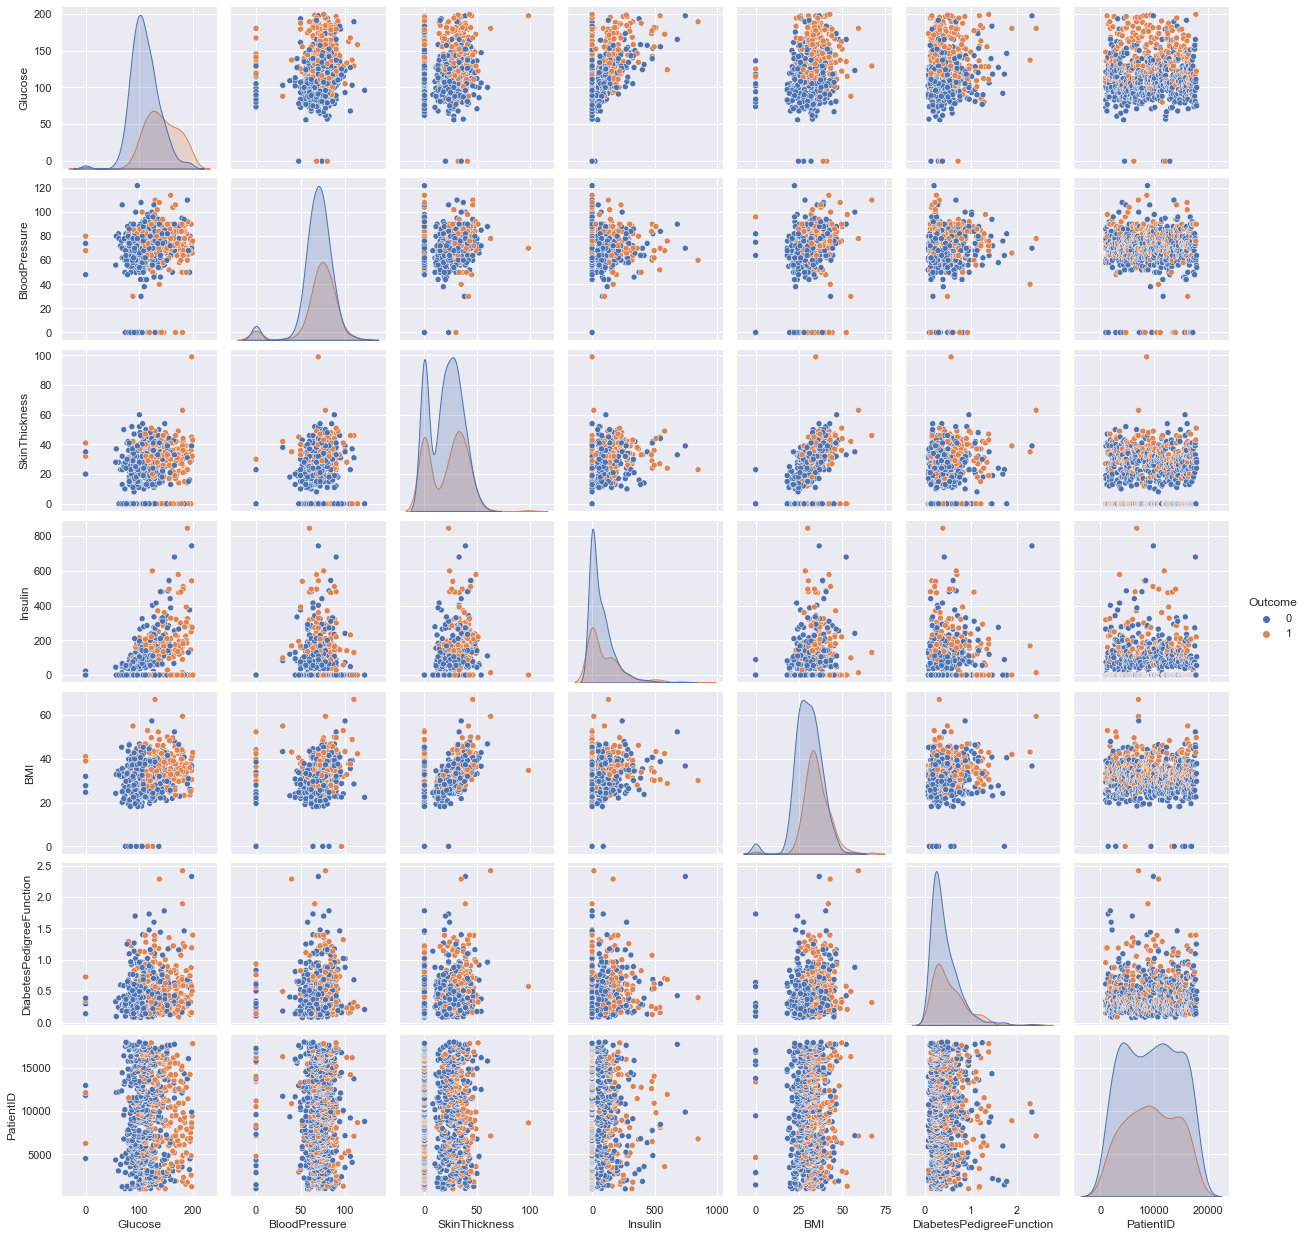

In [22]:
sns.set_theme(style="darkgrid")

sns.pairplot(df_diabetes, hue="Outcome")

In [23]:
df_patient = pd.read_csv("data/patient_data.csv")
df_patient.head()

,PatientID,BirthYear,City,State,Country
0,1017,1998,Winona,Minnesota,United States
1,1031,1988,Springfield,Illinois,United States
2,1033,1992,Socorro,Texas,United States
3,1035,1998,Erie,Pennsylvania,United States
4,1048,1987,Sioux Falls,South Dakota,United States


In [24]:
print(f"//----> shape: {df_patient.shape}")
df_patient.info()

//----> shape: (932, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatientID  932 non-null    int64 
 1   BirthYear  932 non-null    int64 
 2   City       932 non-null    object
 3   State      932 non-null    object
 4   Country    932 non-null    object
dtypes: int64(2), object(3)
memory usage: 36.5+ KB


In [25]:
df_patient.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,932.0,9413.204936,5038.881999,95.0,5007.5,9383.5,13829.0,17995.0
BirthYear,932.0,1981.948498,17.457007,1931.0,1973.0,1988.0,1996.0,2001.0


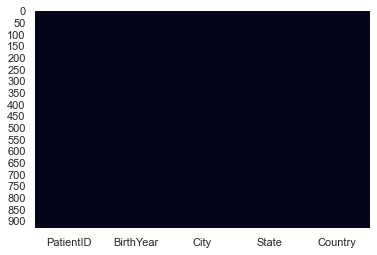

In [26]:
sns.heatmap(df_patient.isnull(), cbar=False)

In [51]:
patients = df_patient.groupby("State").size().to_frame(name='count').reset_index()

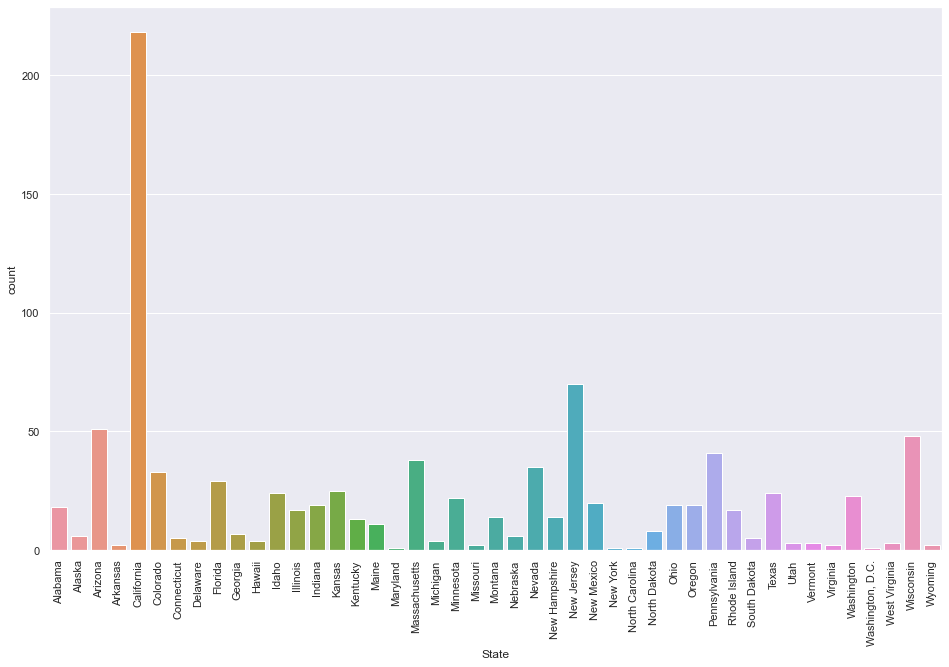

In [64]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.barplot(x="State", y="count", data=patients)

In [65]:
patients = df_patient.groupby("BirthYear").size().to_frame(name='count').reset_index()

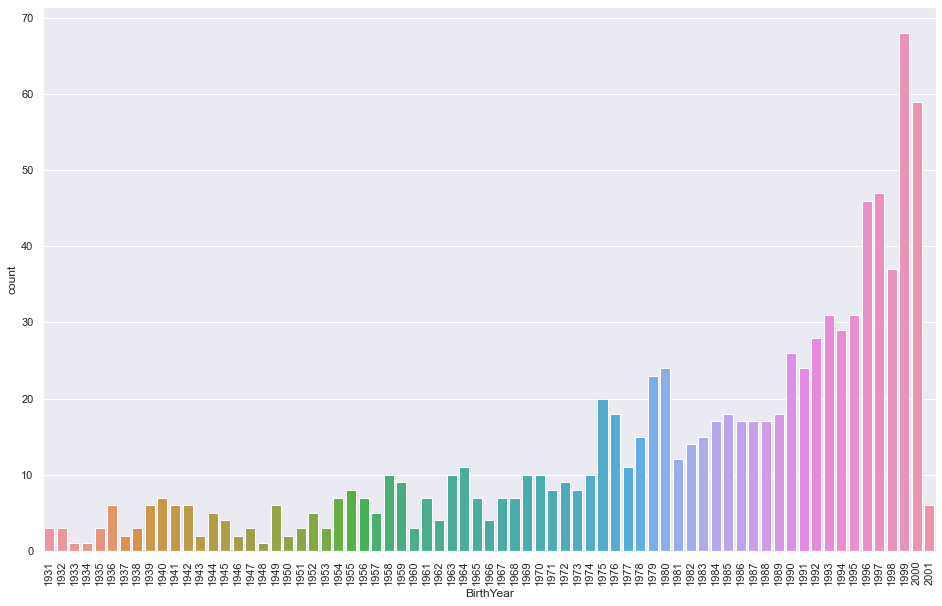

In [66]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.barplot(x="BirthYear", y="count", data=patients)

In [68]:
df_pregnancies = pd.read_csv("data/pregnancies_records.csv")
df_pregnancies.head()

,PatientID,PregnancyRecordID
0,1017,7119
1,1017,7120
2,1031,7217
3,1031,7218
4,1031,7219


In [69]:
print(f"//----> shape: {df_pregnancies.shape}")
df_pregnancies.info()

//----> shape: (3060, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PatientID          3060 non-null   int64
 1   PregnancyRecordID  3060 non-null   int64
dtypes: int64(2)
memory usage: 47.9 KB


In [70]:
df_pregnancies.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,3060.0,10229.397386,4866.164878,1017.0,6010.00,10878.5,14307.00,17995.0
PregnancyRecordID,3060.0,71608.722549,34063.248817,7119.0,42070.75,76154.5,100154.25,125966.0


In [88]:
pregnancies_sum = df_pregnancies.groupby("PatientID", as_index=False).agg({"PregnancyRecordID": "count"})

In [90]:
pregnancies_sum.columns=["PatientID", "PregnanciesCount"]

In [91]:
combined = pd.merge(pd.merge(df_diabetes, df_patient, on="PatientID", how="left"), pregnancies_sum, on="PatientID", how="left")

In [92]:
combined.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome,BirthYear,City,State,Country,PregnanciesCount
0,101,58,17,265,24.2,0.614,1017,0,1998,Winona,Minnesota,United States,2.0
1,108,70,0,0,30.5,0.955,1031,1,1988,Springfield,Illinois,United States,8.0
2,148,60,27,318,30.9,0.150,1033,1,1992,Socorro,Texas,United States,4.0
3,113,76,0,0,33.3,0.278,1035,1,1998,Erie,Pennsylvania,United States,NaN
4,83,86,19,0,29.3,0.317,1048,0,1987,Sioux Falls,South Dakota,United States,4.0


In [93]:
combined.shape

(686, 13)

In [94]:
year = date.today().year
year

2021

In [95]:
combined['age']=year-combined['BirthYear']

In [96]:
combined.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome,BirthYear,City,State,Country,PregnanciesCount,age
0,101,58,17,265,24.2,0.614,1017,0,1998,Winona,Minnesota,United States,2.0,23
1,108,70,0,0,30.5,0.955,1031,1,1988,Springfield,Illinois,United States,8.0,33
2,148,60,27,318,30.9,0.150,1033,1,1992,Socorro,Texas,United States,4.0,29
3,113,76,0,0,33.3,0.278,1035,1,1998,Erie,Pennsylvania,United States,NaN,23
4,83,86,19,0,29.3,0.317,1048,0,1987,Sioux Falls,South Dakota,United States,4.0,34


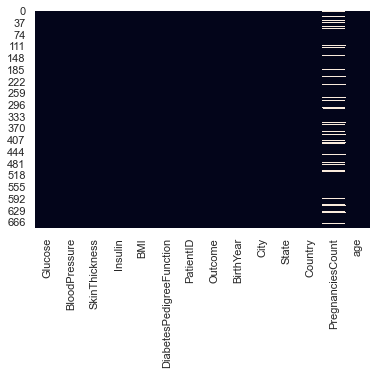

In [97]:
sns.heatmap(combined.isnull(), cbar=False)

In [98]:
combined.isnull().sum()

Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
PatientID                     0
Outcome                       0
BirthYear                     0
City                          0
State                         0
Country                       0
PregnanciesCount            100
age                           0
dtype: int64

In [99]:
combined["PregnanciesCount"].fillna(0, inplace=True)

In [100]:
combined.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'PatientID', 'Outcome', 'BirthYear', 'City',
       'State', 'Country', 'PregnanciesCount', 'age'],
      dtype='object')

In [101]:
numerical_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'PregnanciesCount', 'age', 'Outcome']

In [102]:
df_features = combined[numerical_features]

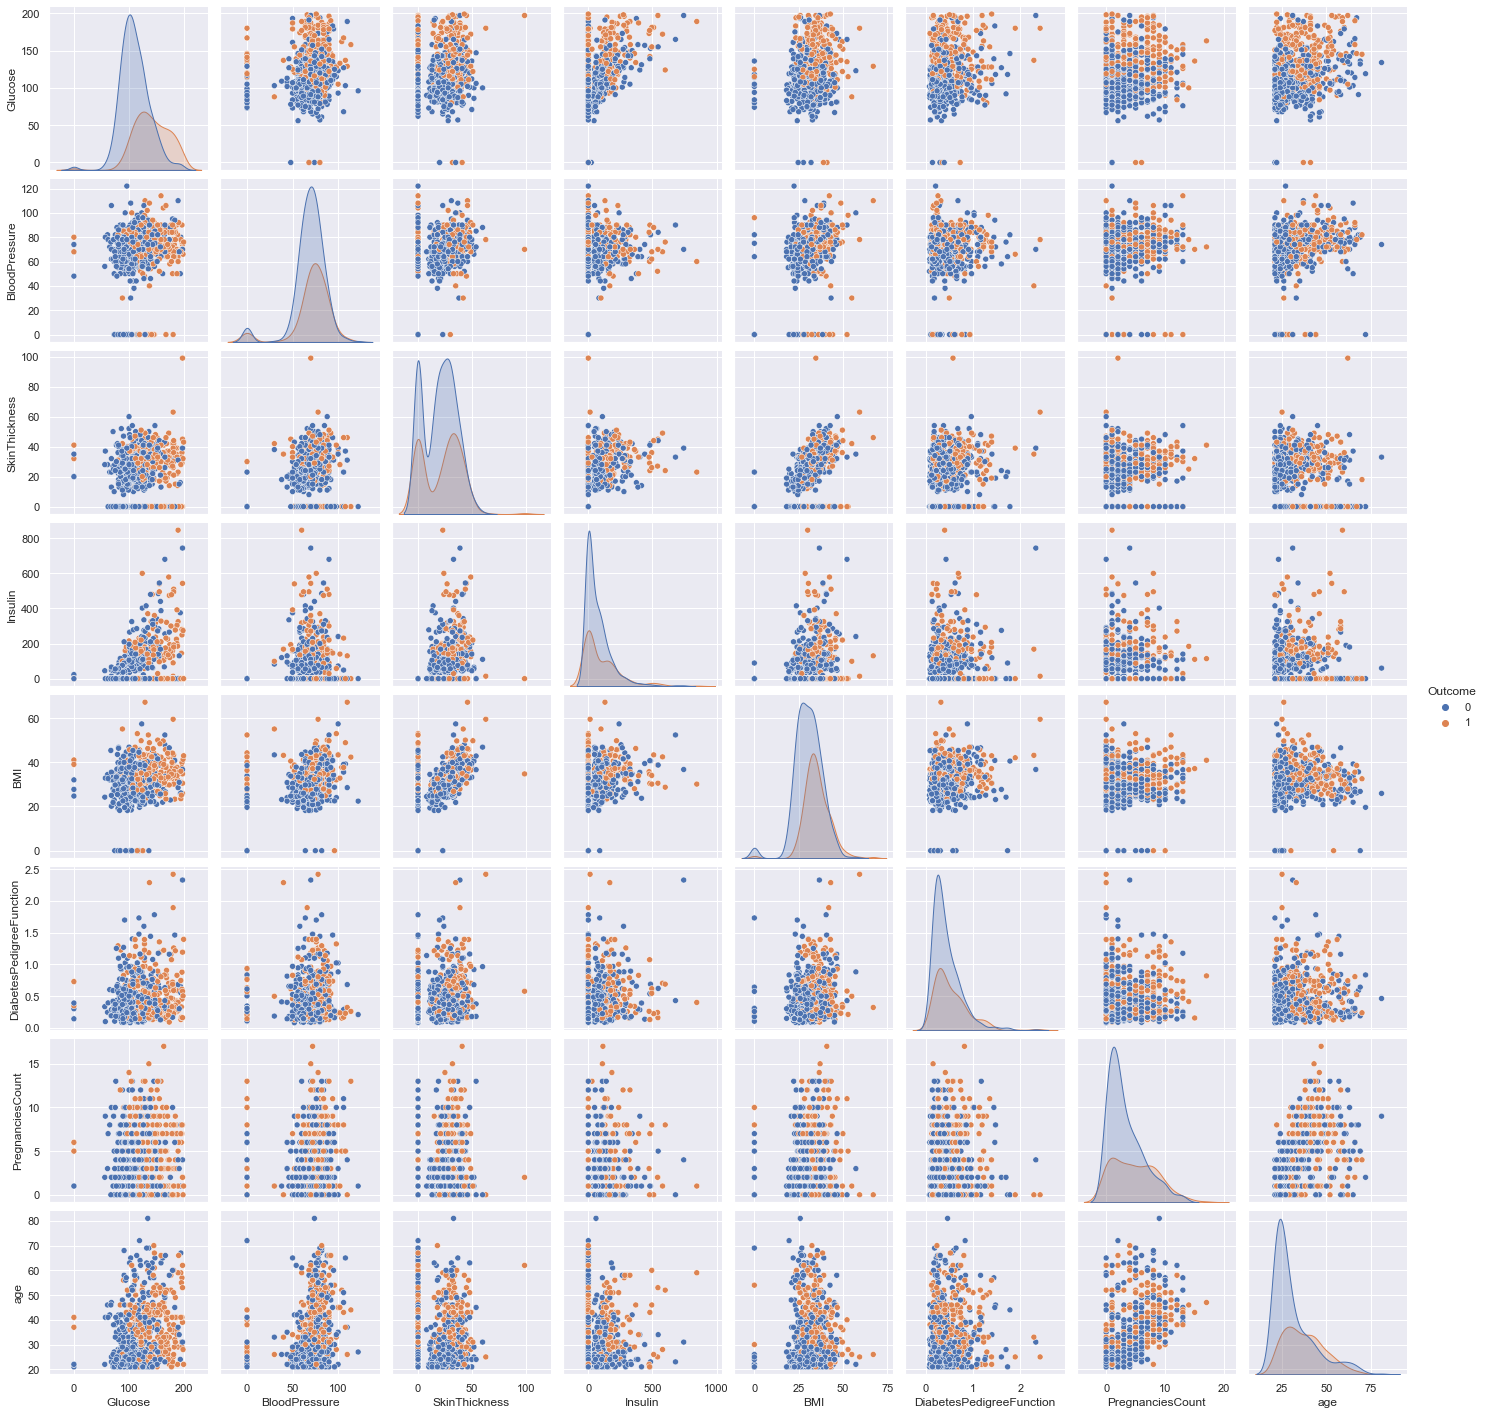

In [104]:
sns.pairplot(df_features, hue="Outcome")

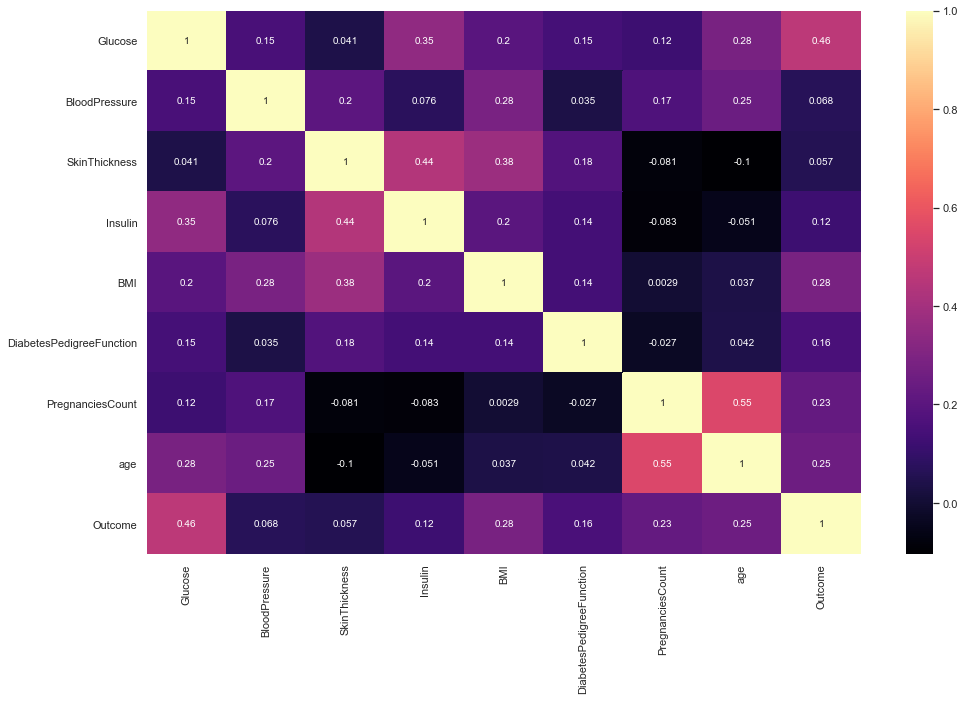

In [105]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_features.corr(), annot=True, ax=ax, cmap="magma")

In [106]:
corr = df_features.corr()

In [108]:
corr[corr.Outcome >= 0.2]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PregnanciesCount,age,Outcome
Glucose,1.000000,0.151477,0.040823,0.346204,0.197695,0.145761,0.124001,0.280342,0.462198
BMI,0.197695,0.284236,0.377623,0.202085,1.000000,0.141266,0.002905,0.037221,0.281862
PregnanciesCount,0.124001,0.170870,-0.081355,-0.082711,0.002905,-0.026915,1.000000,0.549196,0.227399
age,0.280342,0.246575,-0.103980,-0.051447,0.037221,0.042310,0.549196,1.000000,0.249978
Outcome,0.462198,0.067968,0.056923,0.121588,0.281862,0.155810,0.227399,0.249978,1.000000
